<a href="https://colab.research.google.com/github/chunjie-sam-liu/TEP-prognosis/blob/main/test/pytorchstepbystep01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

In [2]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)    
except ModuleNotFoundError:
    pass

In [3]:
from config import *
config_chapter1()
# This is needed to render the plots in this chapter
from plots.chapter1 import *

Installing torchviz...
Creating folders...
Finished!


In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

# A simple Regression Problem
## Data generation
### Synthetic data generation

In [5]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

In [6]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4de6154a8>,
       dtype=object))

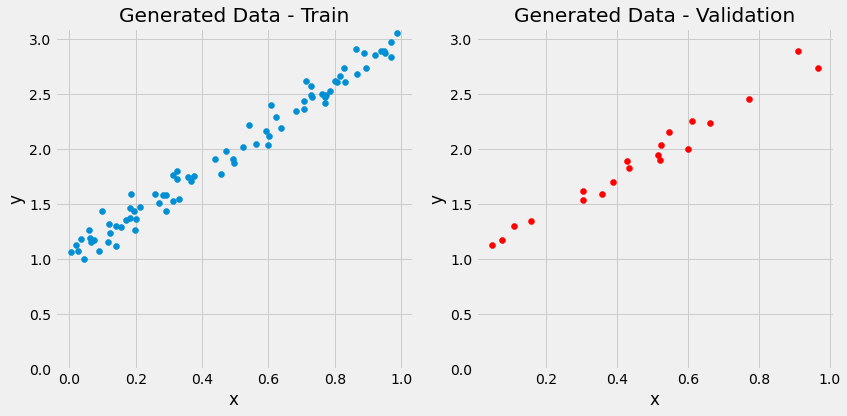

In [7]:
figure1(x_train, y_train, x_val, y_val)

# Gradient Descent

## Step0: Random Initialization

In [8]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


# Step 1: Compute Model's Predictions

In [9]:
yhat = b + w * x_train

# Step 2: Compute the Loss

In [10]:
error = (yhat - y_train) 
loss = (error ** 2).mean()
print(loss)

2.7421577700550976


# Step 3: Compute the Gradients



In [11]:
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(f'b_grad={b_grad}, w_grad={w_grad}')

b_grad=-3.044811379650508, w_grad=-1.8337537171510832


# Step 4: Update the Parameters

In [12]:
lr = 0.1
print(b, w)

b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


# Linear Regression in Numpy

In [13]:
true_b = 1
true_w = 2
N = 100
# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

In [14]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4d6528da0>,
       dtype=object))

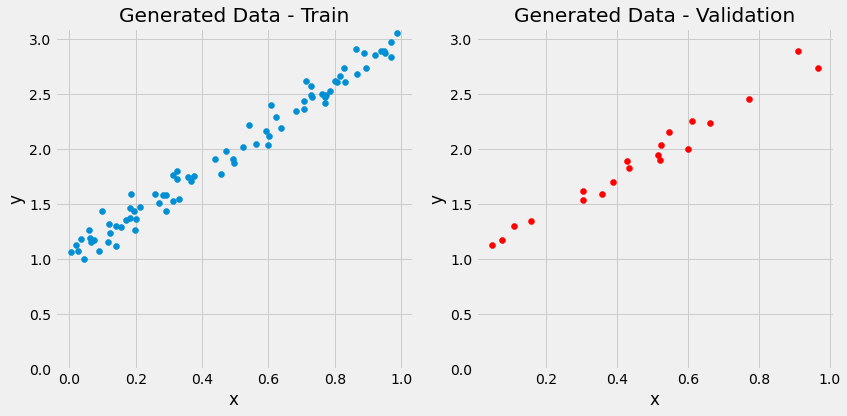

In [15]:
figure1(x_train, y_train, x_val, y_val)

In [16]:
np.random.seed(42)
w = np.random.randn(1)
b = np.random.randn(1)

print(w, b)

[0.49671415] [-0.1382643]


In [17]:
lr = 0.01
n_epochs = 10000
for epoch in range(n_epochs):

  # Step 1 - Compute model's prediction output - forward pass
  yhat = b + w * x_train
  
  # Step 2 - Compute the loss
  # We use all data points, so is this Batch Gradient descent.
  error = (y_train - yhat) # must y_train - yhat?
  # Linear regression - MSE
  loss = (error ** 2).mean()
  
  # Step 3 - Compute gradients for both 'b' and 'w' parameters
  b_grad = -2 * error.mean()
  w_grad = -2 * (x_train * error).mean()

  # Step 4 - Update parameters using gradients and the learning rate
  b = b - lr * b_grad
  w = w - lr * w_grad

print(b, w)


[1.02354085] [1.96896428]


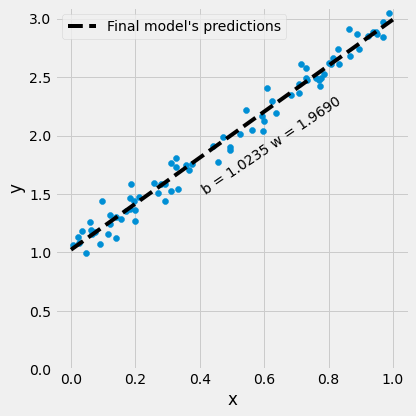

In [18]:
fig = figure3(x_train, y_train)

# PyTorch
## Tensor

In [19]:
scalar = torch.tensor(3.14159)
vector = torch.tensor([1,2,3])
matrix = torch.ones((2,3), dtype=torch.float)
tensor = torch.randn((2,3,4), dtype=torch.float)

print(scalar, vector, matrix, tensor, sep='\n')

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[ 0.3999, -0.3713,  0.1601, -0.3111],
         [-0.8394, -0.3537, -0.9551,  0.1567],
         [-0.0076,  0.0129, -0.6549, -0.3276]],

        [[-0.9917, -0.3956,  1.4940,  0.6351],
         [ 2.4050, -1.1833,  0.6329, -0.0095],
         [-0.5159, -0.3921,  1.7448,  0.0623]]])


In [20]:
print(tensor.size(), tensor.shape)
print(scalar.size(), scalar.shape)

torch.Size([2, 3, 4]) torch.Size([2, 3, 4])
torch.Size([]) torch.Size([])


In [21]:
same_matrix = matrix.view(1, 6)
same_matrix[0, 1] = 2.

print(matrix)
print(same_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 2., 1., 1., 1., 1.]])


In [22]:
another_matrix = matrix.view(1, 6).clone().detach()
another_matrix[0, 1] = 4.0


print(matrix)
print(another_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 4., 1., 1., 1., 1.]])


In [23]:
x_train_tensor = torch.as_tensor(x_train)

In [24]:
x_train.dtype, x_train_tensor.dtype

(dtype('float64'), torch.float64)

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [28]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
  print(torch.cuda.get_device_name(i))

Tesla P100-PCIE-16GB


In [30]:
gpu_tensor = torch.as_tensor(x_train).to(device)
gpu_tensor[0]

tensor([0.7713], device='cuda:0', dtype=torch.float64)

In [44]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [32]:
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


In [33]:
back_to_numpy = x_train_tensor.numpy()

TypeError: ignored

In [34]:
back_to_numpy = x_train_tensor.cpu().numpy()

# Creating Parameters

In [45]:
torch.manual_seed(42)

b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(b, w, sep='\n')

tensor([0.3367], device='cuda:0', grad_fn=<CopyBackwards>)
tensor([0.1288], device='cuda:0', grad_fn=<CopyBackwards>)


In [46]:
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

print(b, w, sep='\n')

tensor([0.1940], device='cuda:0', requires_grad=True)
tensor([0.1391], device='cuda:0', requires_grad=True)


# Autograd

In [52]:
# 1. Model forward
yhat = b + w * x_train_tensor

# 2. Loss
error = (y_train_tensor - yhat)
loss = (error ** 2).mean()

# 3. Gradient
loss.backward()

In [53]:
print(error.requires_grad, yhat.requires_grad, b.requires_grad, w.requires_grad)

True True True True


In [54]:
print(y_train_tensor.requires_grad, x_train_tensor.requires_grad)

False False


## grad

In [55]:
print(b.grad, w.grad, sep='\n')

tensor([-6.7762], device='cuda:0')
tensor([-3.8878], device='cuda:0')


In [56]:
b.grad.zero_(), w.grad.zero_()

(tensor([0.], device='cuda:0'), tensor([0.], device='cuda:0'))

# Update parameters

In [63]:
lr = 0.1
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

In [64]:
n_epochs = 10000

In [65]:
for epoch in range(n_epochs):
  # Step 1 - Compute model's predicted output - forward
  yhat = b + w * x_train_tensor

  # Step 2 - Compute the loss
  # use all data points, so is Batch Gradient Descent
  error = (y_train_tensor - yhat)
  loss = (error ** 2).mean()

  # Step 3 - Compute Gradient
  loss.backward()

  # Step 4 - Update Parameters
  # No_grad to keep the update out of the gradient computation.

  with torch.no_grad():
    b -= lr * b.grad
    w -= lr * w.grad
  
  b.grad.zero_()
  w.grad.zero_()


print(b, w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


# Dynamic Computation Graph

In [66]:
lr = 0.1
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

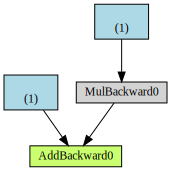

In [67]:
yhat = b + w * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

make_dot(yhat)

# Optimizer

In [68]:
# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr = lr)

In [69]:
# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient 
    # descent. How wrong is our model? That's the error! 
    error = y_train_tensor - yhat
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate. No more manual update!
    # with torch.no_grad():
    #     b -= lr * b.grad
    #     w -= lr * w.grad
    optimizer.step()
    
    # No more telling Pytorch to let gradients go!
    # b.grad.zero_()
    # w.grad.zero_()
    optimizer.zero_grad()
    
print(b, w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


# Loss

In [70]:
# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')
loss_fn

MSELoss()

In [71]:
# This is a random example to illustrate the loss function
predictions = torch.tensor([0.5, 1.0])
labels = torch.tensor([2.0, 1.3])
loss_fn(predictions, labels)

tensor(1.1700)

In [73]:
# Sets learning rate - this is "eta" ~ the "n"-like
# Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    # No more manual loss!
    # error = y_train_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(y_train_tensor, yhat)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()
    
print(b, w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [74]:
loss

tensor(0.0080, device='cuda:0', grad_fn=<MseLossBackward>)

In [75]:
loss.cpu().numpy()

RuntimeError: ignored

In [76]:
loss.detach().cpu().numpy()

array(0.00804466, dtype=float32)

In [77]:
print(loss.item(), loss.tolist())

0.008044655434787273 0.008044655434787273


# Model

In [138]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "b" and "w" real parameters of the model,
        # we need to wrap them with nn.Parameter
        self.b = nn.Parameter(torch.randn(1,
                                          requires_grad=True, 
                                          dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1, 
                                          requires_grad=True,
                                          dtype=torch.float))
        
    def forward(self, x):
        # Computes the outputs / predictions
        return self.b + self.w * x

# Parameters

In [139]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
dummy = ManualLinearRegression()
list(dummy.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [140]:
dummy.state_dict()

OrderedDict([('b', tensor([0.3367])), ('w', tensor([0.1288]))])

In [141]:
optimizer.state_dict()

{'param_groups': [{'dampening': 0,
   'lr': 0.1,
   'momentum': 0,
   'nesterov': False,
   'params': [0, 1],
   'weight_decay': 0}],
 'state': {}}

# device

In [142]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
# and sends it to the device
dummy = ManualLinearRegression().to(device)

In [143]:
# Sets learning rate - this is "eta" ~ the "n"-like
# Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)

# Defines a SGD optimizer to update the parameters 
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000


In [144]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)]

In [145]:
model.state_dict()

OrderedDict([('b', tensor([0.3367], device='cuda:0')),
             ('w', tensor([0.1288], device='cuda:0'))])

In [146]:
x_train_tensor.shape, y_train_tensor.shape

(torch.Size([80, 1]), torch.Size([80, 1]))

In [148]:
for epoch in range(n_epochs):
  model.train() # What is this?!? training loop!

  # Step 1 - Computes model's predicted output - forward pass
  # No more manual prediction!
  yhat = model(x_train_tensor)
  
  # Step 2 - Computes the loss
  loss = loss_fn(yhat, y_train_tensor)

  # Step 3 - Computes gradients for both "b" and "w" parameters
  loss.backward()
  
  # Step 4 - Updates parameters using gradients and
  # the learning rate
  optimizer.step()
  optimizer.zero_grad()
  
# We can also inspect its parameters using its state_dict
print(model.state_dict())

OrderedDict([('b', tensor([1.0235], device='cuda:0')), ('w', tensor([1.9690], device='cuda:0'))])


# Nested Models

In [149]:
linear = nn.Linear(1, 1)
linear

Linear(in_features=1, out_features=1, bias=True)

In [150]:
linear.state_dict()

OrderedDict([('weight', tensor([[-0.2191]])), ('bias', tensor([0.2018]))])

In [154]:
class MyLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1, 1)
  
  def forward(self, x):
    return self.linear(x)

In [155]:
torch.manual_seed(42)
model = MyLinearRegression().to(device)

In [156]:
model(x_train_tensor)

tensor([[1.4197],
        [0.8786],
        [1.4899],
        [0.8494],
        [1.3896],
        [0.8866],
        [0.9819],
        [1.0678],
        [1.1910],
        [1.5713],
        [0.9233],
        [1.4226],
        [1.4433],
        [1.3878],
        [0.9047],
        [0.9713],
        [0.9493],
        [0.8457],
        [1.5845],
        [1.3065],
        [1.3714],
        [1.2871],
        [1.5348],
        [1.3174],
        [1.0448],
        [1.0279],
        [0.9214],
        [1.3874],
        [1.5555],
        [1.2945],
        [1.2591],
        [1.2075],
        [0.9690],
        [1.0375],
        [1.5715],
        [0.9923],
        [0.9702],
        [1.4922],
        [1.1164],
        [1.0527],
        [1.4481],
        [0.8744],
        [1.4664],
        [1.2449],
        [1.4204],
        [1.5083],
        [0.8977],
        [0.8646],
        [1.2829],
        [1.3531],
        [1.3753],
        [0.8563],
        [1.2896],
        [1.4535],
        [1.1665],
        [1

In [157]:
list(model.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

In [159]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear.bias', tensor([0.8300], device='cuda:0'))])

In [160]:
model = nn.Sequential(nn.Linear(1, 1)).to(device)
model.state_dict()

OrderedDict([('0.weight', tensor([[-0.2343]], device='cuda:0')),
             ('0.bias', tensor([0.9186], device='cuda:0'))])

In [161]:
model(x_train_tensor)

tensor([[0.7379],
        [0.9037],
        [0.7164],
        [0.9127],
        [0.7471],
        [0.9013],
        [0.8721],
        [0.8458],
        [0.8080],
        [0.6915],
        [0.8900],
        [0.7370],
        [0.7307],
        [0.7477],
        [0.8957],
        [0.8753],
        [0.8821],
        [0.9138],
        [0.6874],
        [0.7726],
        [0.7527],
        [0.7785],
        [0.7026],
        [0.7692],
        [0.8528],
        [0.8580],
        [0.8906],
        [0.7478],
        [0.6963],
        [0.7763],
        [0.7871],
        [0.8029],
        [0.8760],
        [0.8550],
        [0.6914],
        [0.8689],
        [0.8756],
        [0.7157],
        [0.8309],
        [0.8504],
        [0.7292],
        [0.9050],
        [0.7236],
        [0.7915],
        [0.7377],
        [0.7108],
        [0.8979],
        [0.9080],
        [0.7798],
        [0.7583],
        [0.7515],
        [0.9106],
        [0.7778],
        [0.7276],
        [0.8155],
        [0

# Layers

In [162]:
model = nn.Sequential(nn.Linear(3, 5), nn.Linear(5, 1)).to(device)
model.state_dict()

OrderedDict([('0.weight', tensor([[-0.1265,  0.1165, -0.2811],
                      [ 0.3391,  0.5090, -0.4236],
                      [ 0.5018,  0.1081,  0.4266],
                      [ 0.0782,  0.2784, -0.0815],
                      [ 0.4451,  0.0853, -0.2695]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.1472, -0.2660, -0.0677, -0.2345,  0.3830], device='cuda:0')),
             ('1.weight',
              tensor([[-0.3530, -0.2062, -0.1263, -0.2689,  0.0422]], device='cuda:0')),
             ('1.bias', tensor([-0.4417], device='cuda:0'))])

In [163]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1265,  0.1165, -0.2811],
         [ 0.3391,  0.5090, -0.4236],
         [ 0.5018,  0.1081,  0.4266],
         [ 0.0782,  0.2784, -0.0815],
         [ 0.4451,  0.0853, -0.2695]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.1472, -0.2660, -0.0677, -0.2345,  0.3830], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([[-0.3530, -0.2062, -0.1263, -0.2689,  0.0422]], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([-0.4417], device='cuda:0', requires_grad=True)]

In [164]:
model = nn.Sequential()
model.add_module('layer1', nn.Linear(3, 5))
model.add_module('layer2', nn.Linear(5, 1))
model.to(device)

Sequential(
  (layer1): Linear(in_features=3, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

# Putting it all together

## Data preparation

### data preparation v0

In [165]:
%%writefile data_preparation/v0.py

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then we send them to the 
# chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

Writing data_preparation/v0.py


In [166]:
%run -i data_preparation/v0.py

<Figure size 432x288 with 0 Axes>

# Model Configuration

In [167]:
%%writefile model_configuration/v0.py

# This is redundant now, but it won't be when we introduce
# Datasets...
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = nn.Sequential(nn.Linear(1, 1)).to(device)

# Defines a SGD optimizer to update the parameters 
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

Writing model_configuration/v0.py


In [168]:
%run -i model_configuration/v0.py

In [169]:
%%writefile model_training/v0.py

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Sets model to TRAIN mode
    model.train()

    # Step 1 - Computes model's predicted output - forward pass
    yhat = model(x_train_tensor)
    
    # Step 2 - Computes the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()

Writing model_training/v0.py


In [170]:
%run -i model_training/v0.py

In [171]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9690]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])
